In [1]:
from utility_bferror import *
import datetime

In [2]:
tb = BFSolver_Toolbox()
er = BFSovler3D_Error(statCombined=False)

# 1. Try One Case

In [4]:
i = 0

ndata,ndataVar = er.ndata[i],er.ndataVar[i]
nmcbg,nmcbgVar = er.nmcbg[i].dot(np.array([1,1,1])), er.nmcbgVar[i].dot(np.array([1,1,1]))
nfake,nfakeVar = er.nfake[i],er.nfakeVar[i]
a,aVar = er.a[i],er.aVar[i]
aVar[a<0.001] = np.zeros_like(a)[a<0.001]

slv0 = BFSolver3D(a)
br0 = slv0.solveQuadEqn(slv0.setMeasuredX(nData=ndata, nMcbg=nmcbg+nfake))
print(br0)

[0.11066456 0.10992264 0.09573794]


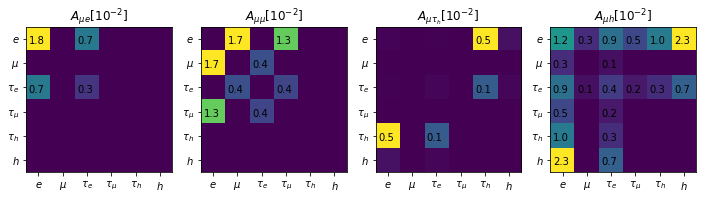

In [4]:
trigger = 'mu'
tb.imshow4Matrix(a,trigger)
plt.savefig("../plots/acceptances/{}1b".format(trigger))

In [6]:
# !!! important, do not delete !!!
# bVector = np.array([ 0.1086,0.1086, 0.1086*0.1785,  0.1086*0.1736 , 0.1086*0.6479, 0.6741 ])
# bMatrix = np.outer(bVector,bVector)
# bMatrix = bMatrix * (2*np.ones_like(bMatrix)-np.identity(6))

# av = common.matrixToArray(a[3])
# bv = common.matrixToArray(bMatrix)

# n = av * bv

# percent = (n/np.sum(n))*100
# for i in range(21):
#     if percent[i]>1:
#         print(percent[i])
#     else:
#         print('--')

# 2. Calculate Statistical Error

In [5]:
total = np.zeros([4,1,3])
# PDG
err = [ er.errConstent(source) for source in ["BtmUp","BteUp"] ]
err = np.array(err).transpose(1,0,2)
total = np.concatenate( (total,err),axis=1 )

# sysCrossSection
err = [ er.errSystem_crossSection(source) for source in ["mcvv",'mcz','mcw',"fakemu","fakee","faketau","lumin","mctt","mctw"] ]
err = np.array(err).transpose(1,0,2)
total = np.concatenate( (total,err),axis=1 )

# sysObjectEff
#err = [ er.errSystem_objectEff(source) for source in ["e","mu","tauID",'jetMisTauID'] ]
err = [ er.errSystem_objectEff(source) for source in ["e","mu",'tauIDNotFactorized'] ]
err = np.array(err).transpose(1,0,2)
total = np.concatenate( (total,err),axis=1 )

# sysEnergyScale
err = [ er.errSystem_energyScale(source) for source in ["E","Mu","Tau"] ]
err = np.array(err).transpose(1,0,2)
total = np.concatenate( (total,err),axis=1 )

# sysJet
err = [ er.errSystem_upDownVariation(source) for source in ["JES","JER","BTag","Mistag"] ]
err = np.array(err).transpose(1,0,2)
total = np.concatenate( (total,err),axis=1 )

er.io_printErrorForExcelFormat(total)

0.000,0.000,0.000, 0.000,0.000,0.000, 0.000,0.000,0.000, 0.000,0.000,0.000
0.006,0.045,0.068, 0.006,0.044,0.068, 0.008,0.044,0.068, 0.008,0.044,0.069
0.029,0.009,0.054, 0.029,0.009,0.054, 0.025,0.006,0.054, 0.025,0.007,0.055
0.000,0.020,0.013, 0.001,0.008,0.004, 0.018,0.001,0.009, 0.005,0.001,0.002
0.147,0.704,0.094, 0.046,0.174,0.032, 0.466,0.140,0.047, 0.066,0.046,0.026
0.159,0.160,0.141, 0.051,0.051,0.043, 0.152,0.156,0.149, 0.051,0.051,0.071
0.647,0.636,1.229, 0.426,0.413,0.677, 0.000,0.000,0.000, 0.000,0.000,0.000
0.000,0.000,0.000, 0.000,0.000,0.000, 0.379,0.388,0.750, 0.207,0.202,0.335
0.259,0.311,1.603, 0.144,0.170,0.891, 0.227,0.276,1.495, 0.115,0.140,0.772
0.153,0.277,0.020, 0.048,0.064,0.005, 0.162,0.148,0.049, 0.009,0.049,0.022
0.008,0.004,0.099, 0.003,0.008,0.048, 0.008,0.011,0.109, 0.008,0.005,0.006
0.009,0.005,0.103, 0.003,0.008,0.050, 0.009,0.011,0.114, 0.009,0.006,0.006
1.024,0.095,0.069, 1.041,0.096,0.068, 1.088,0.112,0.077, 1.033,0.104,0.072
0.140,1.188,0.109, 0.128,

In [10]:
# statistics
# err = [ er.errStat(source) for source in ["data","mcbg","mcsg"] ]
# err = np.array(err).transpose(1,0,2)
# er.io_printErrorForExcelFormat(err)
# total = np.concatenate( (total,err),axis=1 )

# # sysLHE
# err = [ er.errSystem_upDownVariation(source) for source in ["Renorm","Factor","PDF"] ]
# # err[0] = err[0]/(0.75/0.1)
# # err[1] = err[1]/(0.75/0.1)
# err = np.array(err).transpose(1,0,2)
# er.io_printErrorForExcelFormat(err)
# #total = np.concatenate( (total,err),axis=1 )

# # errSystem_ttTheory
# err = [ er.errSystem_upDownVariation(source) for source in [ "ISR","FSR","UE","MEPS"] ]
# # err[0] = err[0]/(0.1108*0.75/0.0011)
# # err[1] = err[1]/(0.1108*0.75/0.0011)
# err = np.array(err).transpose(1,0,2)
# er.io_printErrorForExcelFormat(err)
# #total = np.concatenate( (total,err),axis=1 )

In [6]:
# systematic
sigma_syst = total.transpose(1,0,2)
s = sigma_syst.shape
sigma_syst = sigma_syst.reshape(s[0],s[1]*s[2])

covar_syst = []
for i in sigma_syst:
    covar_syst.append(np.outer(i,i))
covar_syst = np.array(covar_syst)

# statistics
sig_stat, covar_stat_raw = er.errStat('data',returnCovar=True)
covar_stat = np.zeros([12,12])
for c in range(4):
    for i in range(3):
        for j in range(3):
            covar_stat[c*3+i,c*3+j] = covar_stat_raw[c,i,j]
            
            
covar = covar_syst
covar[0] = covar_stat

In [7]:
np.save('../data/covar_2',covar)
np.save('../data/sigma_2',sigma_syst) 

# Do it with Statistical Combined


In [ ]:
er = BFSovler3D_Error(statCombined=True)

In [5]:
err  = []
err += [ er.errConstent(source) for source in ["BtmUp","BteUp"] ]
err += [ er.errSystem_crossSection(source) for source in ["mcvv",'mcz','mcw',"fakemu","fakee","faketau","lumin","mctt","mctw"] ]
err += [ er.errSystem_objectEff(source) for source in ["e","mu","tauID",'jetMisTauID'] ]
err += [ er.errSystem_energyScale(source) for source in ["E","Mu","Tau"] ]
err += [ er.errSystem_upDownVariation(source) for source in ["JES","JER","BTag","Mistag"] ]
err  = np.array(err)

In [6]:
er.io_printErrorForExcelFormat(err)
total = np.sum( err**2,axis=0)[None,:]**0.5
er.io_printErrorForExcelFormat(total)

0.007,0.049,0.076
0.031,0.008,0.060
0.004,0.007,0.009
0.010,0.146,0.048
0.125,0.122,0.130
0.411,0.226,0.658
0.091,0.193,0.273
0.221,0.253,1.365
0.057,0.014,0.038
0.004,0.005,0.085
0.004,0.005,0.089
1.037,0.102,0.081
0.127,1.078,0.111
0.690,0.820,4.363
0.617,0.728,3.880
0.227,0.144,0.008
0.063,0.100,0.005
0.263,0.312,1.660
1.613,1.488,3.720
0.131,0.115,0.402
0.260,0.386,0.789
0.074,0.050,0.159
2.239,2.253,7.343
